<p align="center"><h1 align="center">Adcanced Machine Learning Models Applied to COVID Diagnosing <br> Data Analysis and Visualization <br>Spring 2024 <br> Nicholas Choong, Qiankun Li</h1>

---
<br>



# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to your drive. The code assume you will upload it to your base folder in drive... however you can change the directory (just make sure to update the path accordingly)**

In [1]:
!pip install opencv-python-headless

In [2]:
# Load libraries and then download data
import pandas as pd
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from itertools import repeat
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

In [3]:
# Specify the path to your dataset zip file
zip_file_path = r'C:\Users\l\Downloads\COVID-19_Radiography_Dataset.zip'
# Specify the extraction path, the empty file location you want to put your files in 
extraction_path = r'C:\Users\l\Downloads\Extracted Dataset'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)
print("Dataset extracted successfully.")

Dataset extracted successfully.


# **STEP 2: Prepare the dataset**

In [4]:
# Extracting all filenames iteratively
base_path = r'C:\Users\l\Downloads\Extracted Dataset\COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)


print('number of images for each category:', [len(f) for f in fnames])
#print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]


#### We notice that there is a slight class imbalance, with the number of images in the "Normal" class being much higher compared to the "COVID" and "Viral Pneumonia" classes. This could potentially lead to biases in model training, where the model might become more biased towards predicting the majority class. Next we try to balance the data. 

In [5]:
#Reduce number of images to first 1345 for each category
fnames[0] = fnames[0][0:1344]
fnames[1] = fnames[1][0:1344]
fnames[2] = fnames[2][0:1344]

# Reduce number of images to first 1345 for each category to balance the dataset
fnames = [f[:1344] for f in fnames]
# Import image, load to array of shape height, width, channels, then min/max transform.
# Write preprocessor that will match up with model's expected input shape.

# Define the image preprocessor
def preprocessor(img_path):
    img = Image.open(img_path).convert("RGB").resize((192, 192))  # Import image, ensure it's in RGB and resize.
    img = (np.float32(img) - 1.) / (255 - 1.)  # Min-max transform.
    img = img.reshape((192, 192, 3))  # Create final shape as array with correct dimensions for Keras.
    return img

# Try on a single image file (imports file and preprocesses it to data with the expected shape)
image_path = os.path.join(base_path, 'COVID/images/COVID-2273.png')
img_shape = preprocessor(image_path).shape
print('Processed image shape:', img_shape)

Processed image shape: (192, 192, 3)


In [6]:
#Import image files iteratively and preprocess them into array of correctly structured data

# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]

# Iteratively import and preprocess data using map function
# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor, image_filepaths))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X = np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

print(len(X) )          # same number of elements as filenames

print(X.shape )         # dimensions now 192,192,3 for all images

print(X.min().round() ) # min value of every image is zero

print(X.max() ) 

4032
(4032, 192, 192, 3)
-0.0
1.0


In [7]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat


# Recall that we have five folders with the following number of images in each folder
#...corresponding to each flower type
print('number of images for each category:', [len(f) for f in fnames])
covid=list(repeat("COVID", 1344))
normal=list(repeat("NORMAL", 1344))
pneumonia=list(repeat("PNEUMONIA", 1344))


#combine into single list of y labels
y_labels = covid + normal + pneumonia


#check length, same as X above
print(len(y_labels))


# Need to one hot encode for Keras.  Let's use Pandas
y = pd.get_dummies(y_labels)


display(y)

number of images for each category: [1344, 1344, 1344]
4032


,COVID,NORMAL,PNEUMONIA
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
4027,False,False,True
4028,False,False,True
4029,False,False,True
4030,False,False,True


#### Now we have a balanced data. 

# **STEP 3: Visualizations <span style="color:yellow;"></span>**

**Use the `fnames` variable to extract images from all possible combinations of input data and plot them below. Make sure to label each plot appropriately**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


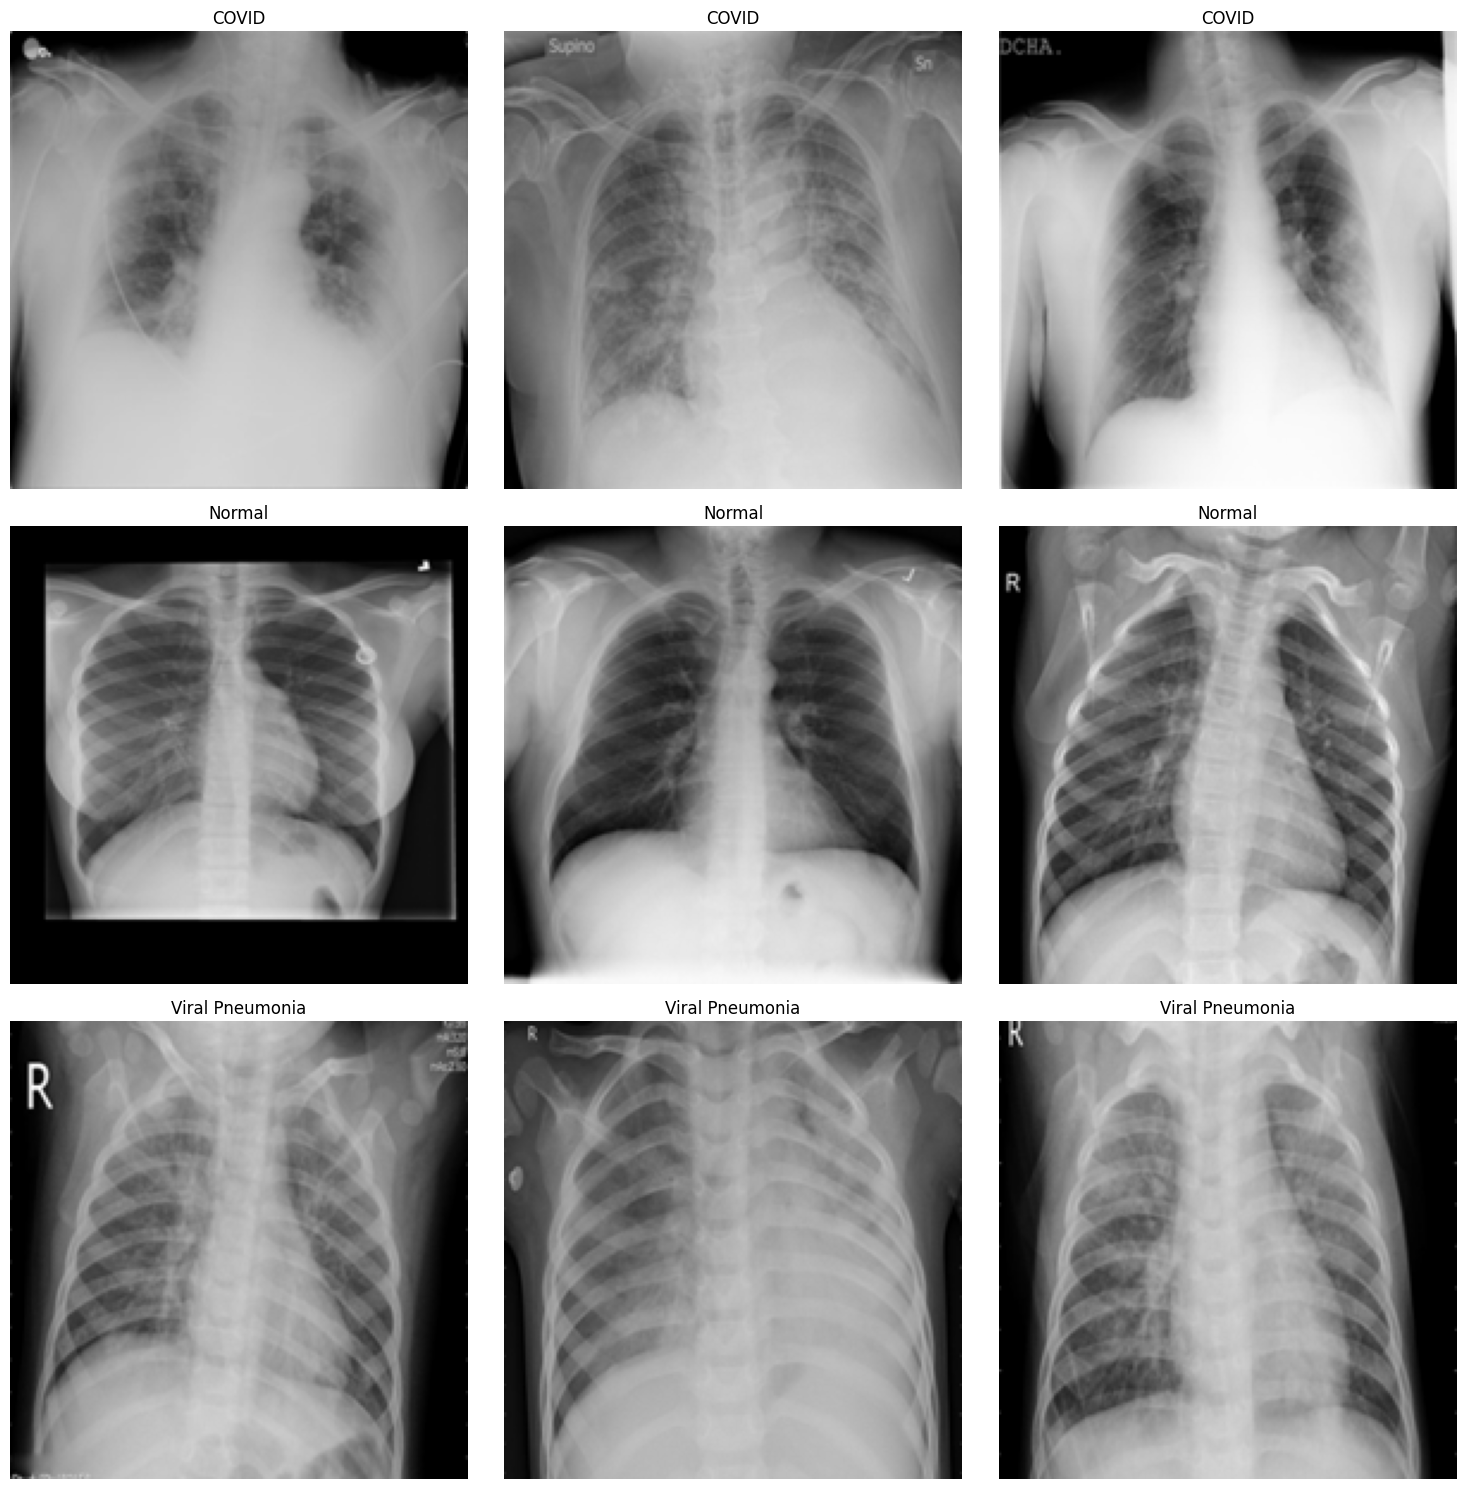

In [8]:
# Function to plot a grid of images
def plot_images(images, titles, rows=1, cols=3):
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    axs = axs.flatten()
    for img, title, ax in zip(images, titles, axs):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Select a few images from each category for visualization
# Here we're taking the first 3 images from each category as an example
num_images = 3
selected_images = [fnames[i][:num_images] for i in range(len(categories))]
selected_images_flat = [item for sublist in selected_images for item in sublist]  # Flatten the list

# Process images through the preprocessor and store their titles
processed_images = [preprocessor(img_path) for img_path in selected_images_flat]
titles = ['COVID', 'COVID', 'COVID', 'Normal', 'Normal', 'Normal', 'Viral Pneumonia', 'Viral Pneumonia', 'Viral Pneumonia']

# Plot the images
plot_images(processed_images, titles, rows=num_images, cols=num_images)

# **STEP 4: Analyzing and Augmenting Dataset <span style="color:yellow;"></span>**


# 4(a) Dataset Analysis

In [9]:
# Base_path is the path your data is extracted to
base_path = r'C:\Users\l\Downloads\Extracted Dataset\COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']


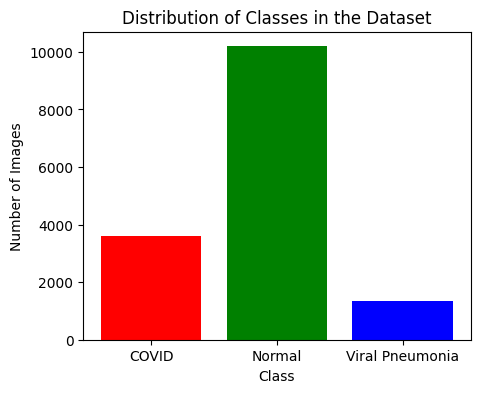

In [10]:
# Counting images in each category
image_counts = {}
for category in categories:
    category_name = category.split('/')[0]  # Extract the actual category name, ensuring consistency
    directory = os.path.join(base_path, category)
    image_counts[category_name] = len(os.listdir(directory))

# Plotting the distribution of classes
plt.figure(figsize=(5, 4))
plt.bar(image_counts.keys(), image_counts.values(), color=['red', 'green', 'blue'])
plt.title('Distribution of Classes in the Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


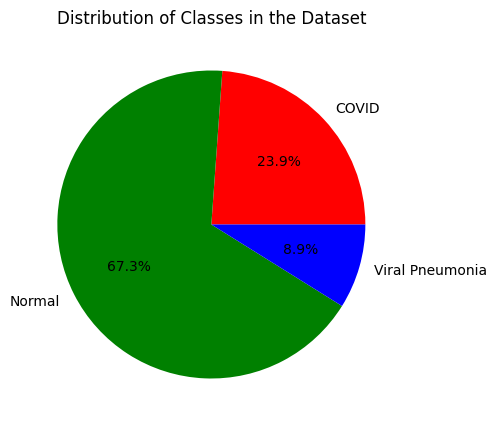

In [11]:
import os
import matplotlib.pyplot as plt

# Assuming 'categories' is a list of category paths and 'base_path' is defined

# Counting images in each category
image_counts = {}
for category in categories:
    category_name = category.split('/')[0]  # Extract the actual category name, ensuring consistency
    directory = os.path.join(base_path, category)
    if os.path.isdir(directory):  # Ensure the directory exists
        image_counts[category_name] = len(os.listdir(directory))

# Plotting the distribution of classes in a pie chart
plt.figure(figsize=(5, 5))  # A square figure size for a better circular shape
plt.pie(image_counts.values(), labels=image_counts.keys(), colors=['red', 'green', 'blue'], autopct='%1.1f%%')
plt.title('Distribution of Classes in the Dataset')
# The xlabel and ylabel are not necessary for a pie chart
plt.show()



From the fan chart, we notice that there is a slight class imbalance, with the number of images in the "Normal" class being much higher compared to the "COVID" and "Viral Pneumonia" classes. This could potentially lead to biases in model training, where the model might become more biased towards predicting the majority class. The "Normal" class has the highest percentage (67.3%), followed by the "COVID" class (23.9%) and the "Viral Pneumonia" class (8.9%). Hence in order to balance the data set, back in part 3, we reduce number of images to first 1345 for each category. 

In [12]:

# Note that 'categories' and 'base_path' must be defined previously

# Analyze image dimensions
image_dimensions = {category.split('/')[0]: [] for category in categories}  # Corrected to ensure key consistency
for category in categories:
    category_name = category.split('/')[0]  # Ensure consistency in category naming
    directory = os.path.join(base_path, category)
    for img_filename in os.listdir(directory):
        img_path = os.path.join(directory, img_filename)
        with Image.open(img_path) as img:
            image_dimensions[category_name].append(img.size)

# Calculate average image dimensions for each category
average_dimensions = {}
for category, dims in image_dimensions.items():
    widths, heights = zip(*dims)
    average_width = np.mean(widths)
    average_height = np.mean(heights)
    average_dimensions[category] = (average_width, average_height)

# Output the average dimensions
for category, (avg_width, avg_height) in average_dimensions.items():
    print(f"{category}: Average Width = {avg_width:.2f} px, Average Height = {avg_height:.2f} px")


COVID: Average Width = 299.00 px, Average Height = 299.00 px
Normal: Average Width = 299.00 px, Average Height = 299.00 px
Viral Pneumonia: Average Width = 299.00 px, Average Height = 299.00 px


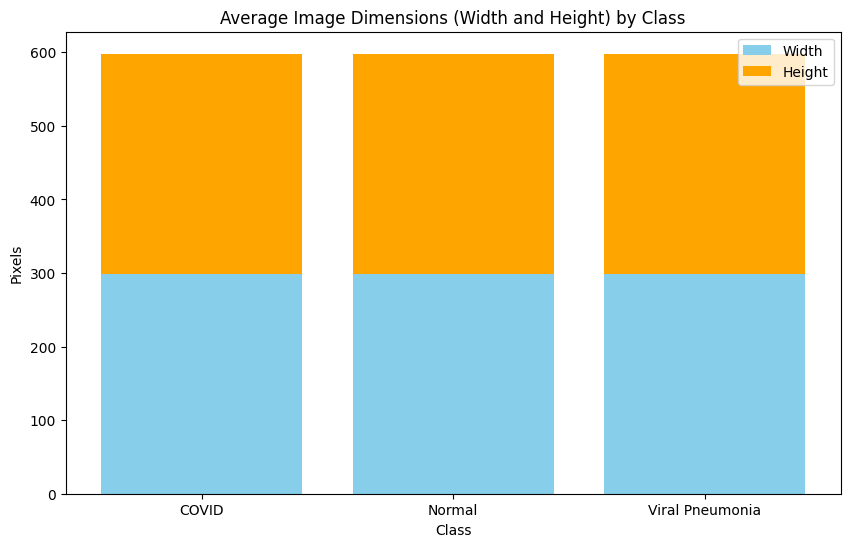

In [13]:
# Analyze image dimensions
image_dimensions = {category.split('/')[0]: [] for category in categories}  # Corrected to ensure key consistency
for category in categories:
    category_name = category.split('/')[0]  # Ensure consistency in category naming
    directory = os.path.join(base_path, category)
    for img_filename in os.listdir(directory):
        img_path = os.path.join(directory, img_filename)
        with Image.open(img_path) as img:
            image_dimensions[category_name].append(img.size)

# Calculate average image dimensions for each category
average_dimensions = {}
for category, dims in image_dimensions.items():
    widths, heights = zip(*dims)
    average_dimensions[category] = (np.mean(widths), np.mean(heights))

# Plot average image dimensions
plt.figure(figsize=(10, 6))
widths, heights = zip(*average_dimensions.values())
plt.bar(average_dimensions.keys(), widths, color='skyblue', label='Width')
plt.bar(average_dimensions.keys(), heights, bottom=widths, color='orange', label='Height')
plt.title('Average Image Dimensions (Width and Height) by Class')
plt.xlabel('Class')
plt.ylabel('Pixels')
plt.legend(loc='upper right')
plt.show()

All images have the same dimensions of (299, 299). This consistency is beneficial for model training as it ensures uniformity in input size.

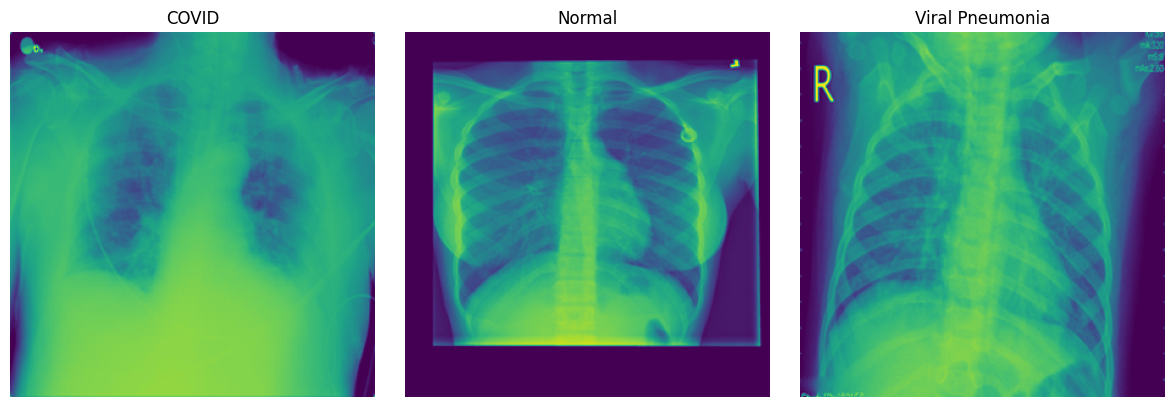

In [14]:
# Show sample images from each category
plt.figure(figsize=(12, 4))
for i, category in enumerate(categories):
    category_name = category.split('/')[0]  # Consistent category naming
    directory = os.path.join(base_path, category)
    sample_image_path = os.path.join(directory, os.listdir(directory)[0])
    img = Image.open(sample_image_path)
    plt.subplot(1, len(categories), i+1)
    plt.imshow(img)
    plt.title(category_name)
    plt.axis('off')
plt.tight_layout()
plt.show()

Image Quality: From the above inputs, we may notice some image quality issues, such as blurriness of the first COVID image. To enhance the dataset's reliability and ensure accurate disease diagnosis ,we may use techniques such as image denoising, sharpening, or excluding low-quality images from the training dataset may be employed to mitigate image quality concerns and improve model performance. 

# 4(b) Data Augumentation

- **Data Augmentation Description:**
  - Data augmentation is a technique used to artificially expand a dataset by creating modified versions of images or samples in the dataset.
  - It is commonly used in computer vision and natural language processing tasks to improve the performance and robustness of machine learning models.

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up the data augmentation configuration
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [16]:
# Select a single image from each category to demonstrate the augmentation.
sample_images = [fnames[i][0] for i in range(len(categories))]  # First image from each category


## In the following code we use majorly two types of Data Augmentation:

- **Symmetry:** Involves flipping an image horizontally or vertically to create new samples.
- **Rotation:** Rotating an image by a certain angle to create new samples.


Category: COVID


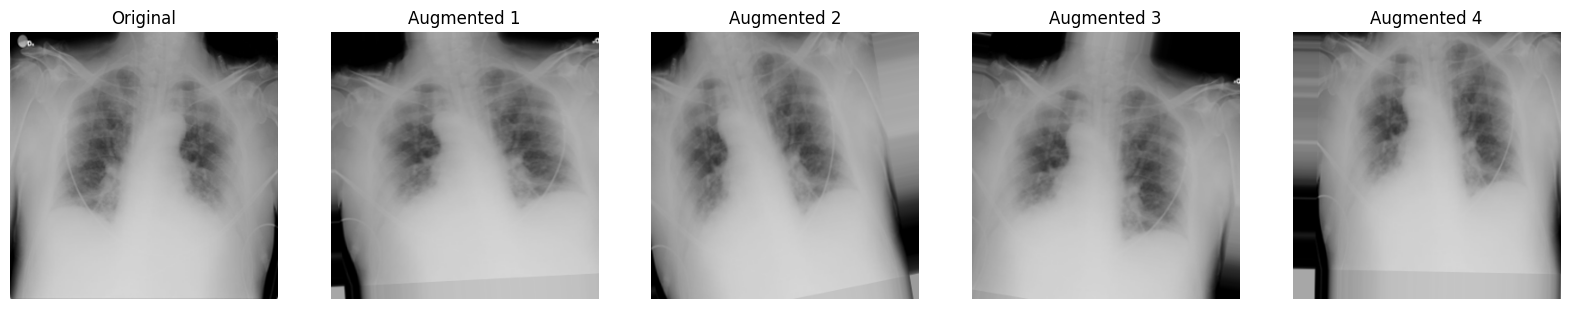

Category: Normal


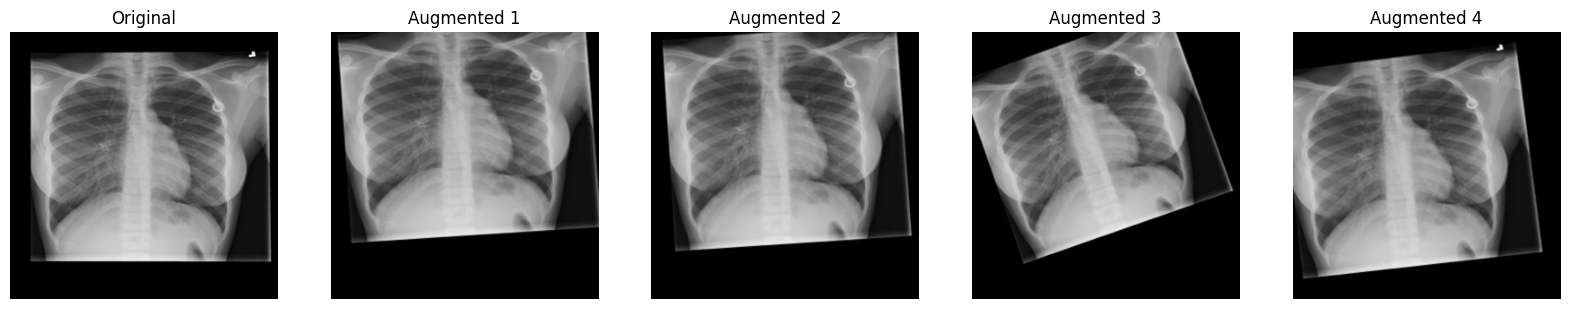

Category: Viral Pneumonia


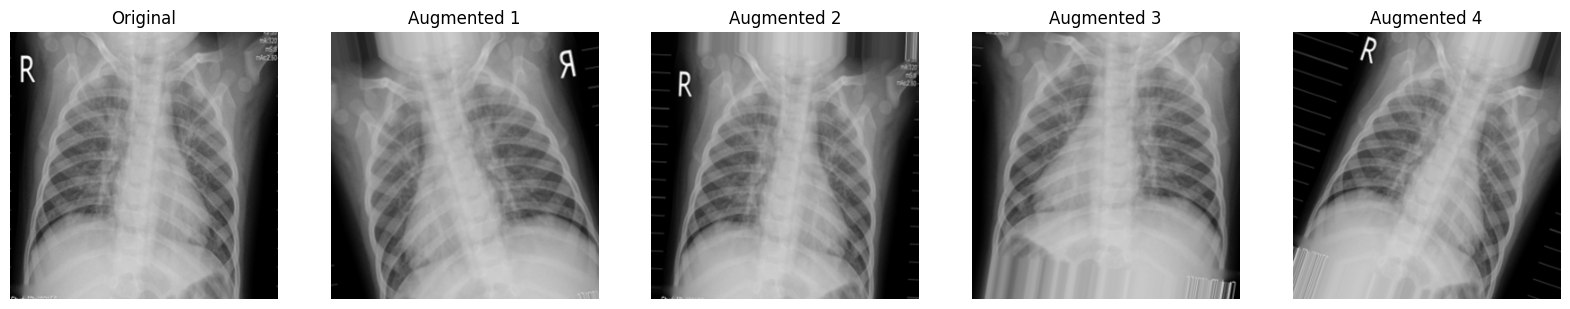

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_augmentation(image_path, data_augmentation, num_examples=4):
    img = load_img(image_path)  # Load the original image
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape image

    fig, axes = plt.subplots(1, num_examples + 1, figsize=(20, 10))  # Setup the plot

    # Plot the original image
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')

    # Generate and plot {num_examples} augmented images
    i = 1
    for batch in data_augmentation.flow(img_array, batch_size=1):
        ax = axes[i]
        ax.imshow(np.uint8(batch[0]))
        ax.set_title(f'Augmented {i}')
        ax.axis('off')
        i += 1
        if i > num_examples:
            break

    plt.show()

# Apply the function to each sample image
category_names = ['COVID', 'Normal', 'Viral Pneumonia']
for image_path, category_name in zip(sample_images, category_names):
    print(f"Category: {category_name}")
    visualize_augmentation(image_path, data_augmentation)

### Now our dataset is 5 time as large as the originial one